<a href="https://colab.research.google.com/github/AbubakreQuam/Baseball-Game-Score-Counter/blob/main/GDPR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
from faker import Faker

# Initializing Faker for random generation
fake = Faker()

# Number of samples to generate
num_samples = 1000000

# Generating the dataset
data = {
    "Lawfulness_Fairness_Transparency": np.random.randint(0, 2, num_samples),
    "Purpose_Limitation": np.random.randint(0, 2, num_samples),
    "Data_Minimisation": np.random.randint(0, 2, num_samples),
    "Accuracy": np.random.randint(0, 2, num_samples),
    "Storage_Limitation": np.random.randint(0, 2, num_samples),
    "Integrity_Confidentiality": np.random.randint(0, 2, num_samples),
    "Accountability": np.random.randint(0, 2, num_samples),
}

# Converting the data into DataFrame
df = pd.DataFrame(data)

# Defining the evaluation label based on the number of passed principles
def evaluate_compliance(row):
    passed_criteria = row.sum()
    if passed_criteria >= 6:
        return "High degree of compliance"
    elif 4 <= passed_criteria <= 5:
        return "Moderate degree of compliance"
    else:
        return "Fail degree of compliance"

# Applying the evaluation function
df["Evaluation_Label"] = df.apply(evaluate_compliance, axis=1)

# Displaying the first few rows of the generated dataset
print(df.head())

# Saving the dataset to a CSV file
#df.to_csv("gdpr_compliance_new_dataset.csv", index=False)
df.to_csv("new_gdpr_compliance_test_data.csv", index=False)


   Lawfulness_Fairness_Transparency  Purpose_Limitation  Data_Minimisation  \
0                                 0                   0                  0   
1                                 1                   0                  0   
2                                 1                   1                  0   
3                                 0                   0                  1   
4                                 1                   1                  1   

   Accuracy  Storage_Limitation  Integrity_Confidentiality  Accountability  \
0         1                   0                          0               1   
1         1                   1                          0               0   
2         1                   1                          1               1   
3         0                   1                          0               1   
4         1                   0                          0               1   

                Evaluation_Label  
0      Fail degree of compl

Count of each compliance level:
Evaluation_Label
Fail degree of compliance        4999983
Moderate degree of compliance    4374526
High degree of compliance         625491
Name: count, dtype: int64


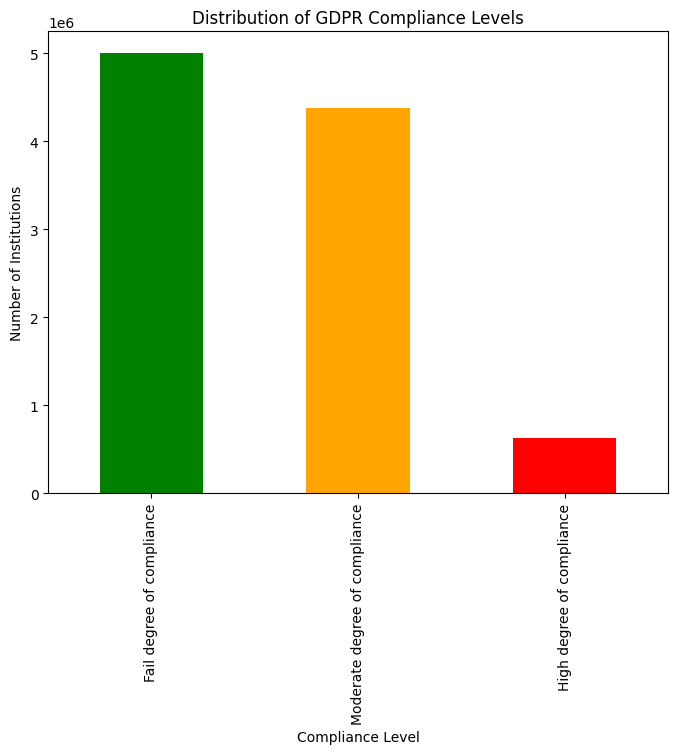

In [ ]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('gdpr_compliance_new_dataset.csv')


# this counts the occurrences of each compliance level
compliance_counts = df['Evaluation_Label'].value_counts()


print("Count of each compliance level:")
print(compliance_counts)

# Plot the distribution using a bar chart
plt.figure(figsize=(8, 6))
compliance_counts.plot(kind='bar', color=['green', 'orange', 'red'])

# Adding titles and labels
plt.title('Distribution of GDPR Compliance Levels')
plt.xlabel('Compliance Level')
plt.ylabel('Number of Institutions')

# Show the plot
plt.show()


**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

**Loading and Preprocessing of the Data**

In [ ]:
# Loading the dataset for training
data = pd.read_csv('gdpr_compliance_new_dataset.csv')

# Spliting features and labels
X = data.drop('Evaluation_Label', axis=1)
y = data['Evaluation_Label']

# Using the agreed One-Hot Encode the labels
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Saving the scaler because retraining and testing
joblib.dump(scaler, 'scaler.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['scaler.pkl']

**Training of SVM, Random Forest, and Naive Bayes Classifiers**

In [ ]:
# Training the SVM model
svm_model = SVC()
svm_model.fit(X_train, np.argmax(y_train, axis=1))  # Convert one-hot back to labels for training
y_pred_svm = svm_model.predict(X_test)

# Saving the trained SVM model
joblib.dump(svm_model, 'svm_model.pkl')

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, np.argmax(y_train, axis=1))  # Convert one-hot back to labels for training
y_pred_rf = rf_model.predict(X_test)

# Saving the trained Random Forest model
joblib.dump(rf_model, 'rf_model.pkl')

# Training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, np.argmax(y_train, axis=1))  # Convert one-hot back to labels for training
y_pred_nb = nb_model.predict(X_test)

# Saving the trained Naive Bayes model
joblib.dump(nb_model, 'nb_model.pkl')

print("Models have been saved successfully.")

Models have been saved successfully.


**Evaluating of the Models**

In [ ]:
# Converting y_test back to labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluating the trained SVM Model
print("SVM Classification Report")
print(classification_report(y_test_labels, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test_labels, y_pred_svm))

# Evaluating the trained Random Forest Model
print("Random Forest Classification Report")
print(classification_report(y_test_labels, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test_labels, y_pred_rf))

# Evaluating the trained Naive Bayes Model
print("Naive Bayes Classification Report")
print(classification_report(y_test_labels, y_pred_nb))
print("Naive Bayes Confusion Matrix")
print(confusion_matrix(y_test_labels, y_pred_nb))

SVM Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1000221
           1       1.00      1.00      1.00    124985
           2       1.00      1.00      1.00    874794

    accuracy                           1.00   2000000
   macro avg       1.00      1.00      1.00   2000000
weighted avg       1.00      1.00      1.00   2000000

SVM Confusion Matrix
[[1000221       0       0]
 [      0  124985       0]
 [      0       0  874794]]
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1000221
           1       1.00      1.00      1.00    124985
           2       1.00      1.00      1.00    874794

    accuracy                           1.00   2000000
   macro avg       1.00      1.00      1.00   2000000
weighted avg       1.00      1.00      1.00   2000000

Random Forest Confusion Matrix
[[1000221       0       0]
 [      0  1249

**Comparing the Performance of the Models**

In [ ]:
# Accuracy Scores
accuracy_svm = accuracy_score(y_test_labels, y_pred_svm)
accuracy_rf = accuracy_score(y_test_labels, y_pred_rf)
accuracy_nb = accuracy_score(y_test_labels, y_pred_nb)

# Printing the Accuracy for the three trained models
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")


SVM Accuracy: 100.00%
Random Forest Accuracy: 100.00%
Naive Bayes Accuracy: 94.53%


**Visualizing of the Performance**

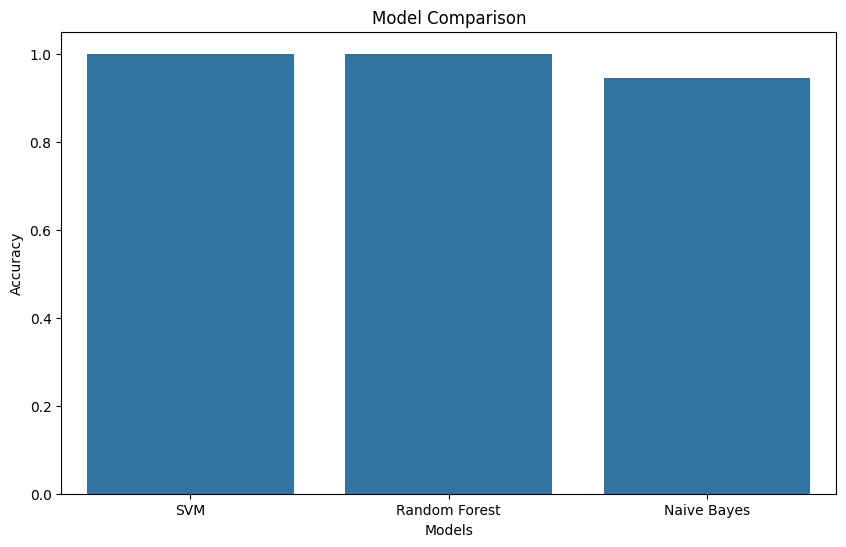

In [ ]:
# Bar Plot for Model Comparison
accuracies = [accuracy_svm, accuracy_rf, accuracy_nb]
models = ['SVM', 'Random Forest', 'Naive Bayes']

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.0 MB/s eta 0:00:00


**Re-Training Saved Model**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Re-Trained Models have been saved successfully.
SVM Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100030
           1       1.00      1.00      1.00     12555
           2       1.00      1.00      1.00     87415

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

SVM Confusion Matrix
[[100030      0      0]
 [     0  12555      0]
 [     0      0  87415]]
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100030
           1       1.00      1.00      1.00     12555
           2       1.00      1.00      1.00     87415

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Random Forest Confusion Matrix
[[1

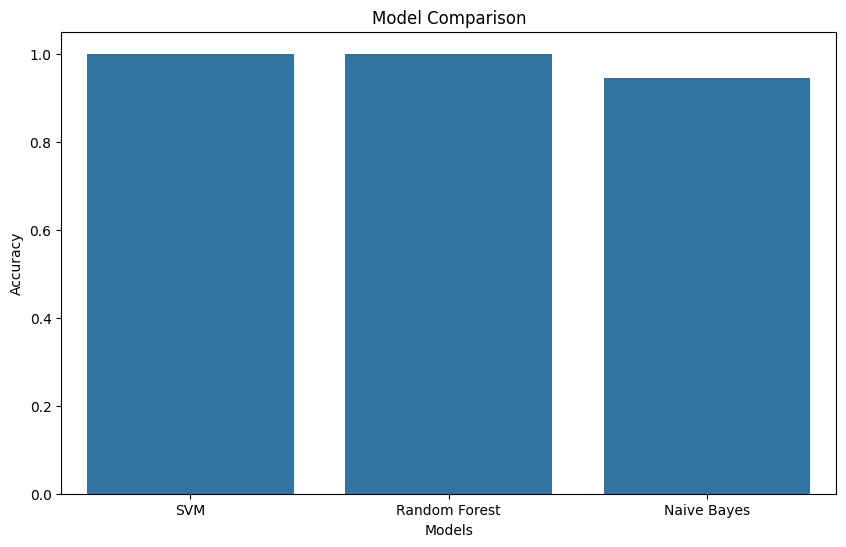

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split # Import the train_test_split function


data = pd.read_csv('gdpr_compliance_new_dataset.csv')

X = data.drop('Evaluation_Label', axis=1)
y = data['Evaluation_Label']

encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Loading the previous saved scaler for training
scaler = joblib.load('scaler.pkl')
X_test = scaler.transform(X_test)

# Re-saving the scaler again
joblib.dump(scaler, 'scaler.pkl')

# Loading the previously trained models
svm_model = joblib.load('svm_model.pkl')
rf_model = joblib.load('rf_model.pkl')
nb_model = joblib.load('nb_model.pkl')

# Predicting using the loaded models
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)


# Saving the Re-trained models
joblib.dump(svm_model, 'ret_svm_model.pkl') # Saving the trained SVM model
joblib.dump(rf_model, 'ret_rf_model.pkl') # Saving the trained Random Forest model
joblib.dump(nb_model, 'ret_nb_model.pkl') # Saving the trained Naive Bayes model

print("Re-Trained Models have been saved successfully.")

# Converting y_test back to labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluating the trained SVM Model
print("SVM Classification Report")
print(classification_report(y_test_labels, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test_labels, y_pred_svm))

# Evaluating the trained Random Forest Model
print("Random Forest Classification Report")
print(classification_report(y_test_labels, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test_labels, y_pred_rf))

# Evaluating the trained Naive Bayes Model
print("Naive Bayes Classification Report")
print(classification_report(y_test_labels, y_pred_nb))
print("Naive Bayes Confusion Matrix")
print(confusion_matrix(y_test_labels, y_pred_nb))

# Accuracy Scores
accuracy_svm = accuracy_score(y_test_labels, y_pred_svm)
accuracy_rf = accuracy_score(y_test_labels, y_pred_rf)
accuracy_nb = accuracy_score(y_test_labels, y_pred_nb)

# Printing the Accuracy Score for the three models
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Bar Plot for Model Comparison
accuracies = [accuracy_svm, accuracy_rf, accuracy_nb]
models = ['SVM', 'Random Forest', 'Naive Bayes']

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


**Testing rained Model on New Datasets**

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


new_data = pd.read_csv('new_gdpr_compliance_test_data.csv')


X_new = new_data.drop('Evaluation_Label', axis=1)
y_new = new_data['Evaluation_Label']


encoder = OneHotEncoder(sparse=False)
y_new = encoder.fit_transform(y_new.values.reshape(-1, 1))

# Scaling the features using the same scaler as during training
# Loading the saved scaler
scaler = joblib.load('scaler.pkl')
X_new = scaler.transform(X_new)

# Loading the three trained saved models
svm_model = joblib.load('ret_svm_model.pkl')
rf_model = joblib.load('ret_rf_model.pkl')
nb_model = joblib.load('ret_nb_model.pkl')


y_pred_svm = svm_model.predict(X_new)
y_pred_rf = rf_model.predict(X_new)
y_pred_nb = nb_model.predict(X_new)


y_new_labels = np.argmax(y_new, axis=1)

# Evaluating the trained SVM  Model
print("SVM Classification Report")
print(classification_report(y_new_labels, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_new_labels, y_pred_svm))

# Evaluating the trained Random Forest Model
print("Random Forest Classification Report")
print(classification_report(y_new_labels, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_new_labels, y_pred_rf))

# Evaluating the trained Naive Bayes Model
print("Naive Bayes Classification Report")
print(classification_report(y_new_labels, y_pred_nb))
print("Naive Bayes Confusion Matrix")
print(confusion_matrix(y_new_labels, y_pred_nb))


SVM Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

SVM Confusion Matrix
[[7 0 0]
 [0 1 0]
 [0 0 2]]
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Random Forest Confusion Matrix
[[7 0 0]
 [0 1 0]
 [0 0 2]]
Naive Bayes Classification Report
              precision    recall 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: P

In [53]:
    # Converting the list to a numpy array and reshape for the model input

    binary_responses = [1, 1, 1, 1, 0, 1, 1]
    X_new = np.array(binary_responses).reshape(1, -1)

    # Loading the pre-fitted scaler (assuming it was saved as 'scaler.pkl')
    scaler = joblib.load('scaler.pkl')

    X_new_scaled = scaler.transform(X_new)

    # Loading the trained Random Forest model
    rf_model = joblib.load('ret_rf_model.pkl')

    # Making predictions
    prediction = rf_model.predict(X_new_scaled)
    print("Predicted Label:", prediction)


    if prediction == [1]:
      print("High degree of compliance")
    elif prediction == [2]:
        print("Moderate degree of compliance")
    else:
        print("Fail degree of compliance")


Predicted Label: [1]
High degree of compliance


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
